In [1]:
!pip install xgboost

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra 
import math
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RepeatedStratifiedKFold
import time
from sklearn.model_selection import cross_val_score
import joblib

# data visualization(for EDA)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
sns.set(color_codes=True)
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!pip install cufflinks

In [4]:
psl_p=pd.read_csv('PSL-2016-2022.csv')
#file imported 

#showing some result to verify import
psl_p.head(20)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,NaN,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,NaN,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,NaN,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,NaN,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,NaN,0,0,False,False,False,NaN,Gladiators
5,2016,1,Islamabad United,Quetta Gladiators,1,1,6,0,NaN,0,0,False,False,False,NaN,Gladiators
6,2016,1,Islamabad United,Quetta Gladiators,1,2,1,0,NaN,0,0,False,False,False,NaN,Gladiators
7,2016,1,Islamabad United,Quetta Gladiators,1,2,2,1,NaN,1,0,False,False,False,NaN,Gladiators
8,2016,1,Islamabad United,Quetta Gladiators,1,2,3,2,NaN,3,0,False,False,False,NaN,Gladiators
9,2016,1,Islamabad United,Quetta Gladiators,1,2,4,0,NaN,3,0,False,False,False,NaN,Gladiators


In [5]:
# checking type
type(psl_p)

pandas.core.frame.DataFrame

In [6]:
# checking shape
psl_p.shape

# it shows 50262 samples and 16 features  or rows and coloumns 

(50262, 16)

In [7]:
#list down Total coloumns
psl_p.columns


Index(['psl_year', 'match_number', 'team_1', 'team_2', 'inning', 'over',
       'ball', 'runs', 'wicket', 'total_runs', 'wickets', 'is_four', 'is_six',
       'is_wicket', 'wicket_text', 'result'],
      dtype='object')

In [8]:
#showing random sample 
psl_p.sample(5)

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
13958,2018,14,Lahore Qalandars,Peshawar Zalmi,1,9,5,1,NaN,70,3,False,False,False,NaN,Zalmi
30040,2020,15,Peshawar Zalmi,Karachi Kings,2,12,3,0,NaN,105,2,False,False,False,NaN,Kings
26730,2019,34,Peshawar Zalmi,Quetta Gladiators,1,13,3,1,NaN,88,3,False,False,False,NaN,Gladiators
25883,2019,30,Peshawar Zalmi,Karachi Kings,2,13,2,6,NaN,112,5,False,True,False,NaN,Zalmi
17569,2018,29,Lahore Qalandars,Peshawar Zalmi,1,15,2,0,NaN,118,3,False,False,False,NaN,Zalmi


# Checking any null values to Data

In [9]:
psl_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50262 entries, 0 to 50261
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   psl_year      50262 non-null  int64  
 1   match_number  50262 non-null  int64  
 2   team_1        50262 non-null  object 
 3   team_2        50262 non-null  object 
 4   inning        50262 non-null  int64  
 5   over          50262 non-null  int64  
 6   ball          50262 non-null  int64  
 7   runs          50262 non-null  int64  
 8   wicket        2661 non-null   float64
 9   total_runs    50262 non-null  int64  
 10  wickets       50262 non-null  int64  
 11  is_four       50262 non-null  bool   
 12  is_six        50262 non-null  bool   
 13  is_wicket     50262 non-null  bool   
 14  wicket_text   2650 non-null   object 
 15  result        50262 non-null  object 
dtypes: bool(3), float64(1), int64(8), object(4)
memory usage: 5.1+ MB


In [10]:
psl_p["wicket"].unique()

array([nan,  1.,  2.,  3.,  4.,  5.,  6.,  8.])

In [11]:
psl_p["wicket"].fillna(0,inplace=True)
psl_p.head()

,psl_year,match_number,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result
0,2016,1,Islamabad United,Quetta Gladiators,1,1,1,0,0.0,0,0,False,False,False,NaN,Gladiators
1,2016,1,Islamabad United,Quetta Gladiators,1,1,2,0,0.0,0,0,False,False,False,NaN,Gladiators
2,2016,1,Islamabad United,Quetta Gladiators,1,1,3,0,0.0,0,0,False,False,False,NaN,Gladiators
3,2016,1,Islamabad United,Quetta Gladiators,1,1,4,0,0.0,0,0,False,False,False,NaN,Gladiators
4,2016,1,Islamabad United,Quetta Gladiators,1,1,5,0,0.0,0,0,False,False,False,NaN,Gladiators


In [12]:
#so we are concern with wicket run overs 

In [13]:
psl_p.groupby("wicket").size()
# it show the total counts of wickets per match from 2016-2022

wicket
0.0    47601
1.0     1669
2.0      497
3.0      201
4.0      230
5.0       58
6.0        5
8.0        1
dtype: int64

In [14]:
psl_p["wicket_text"].unique()

array([nan, 'caught', 'bowled', 'lbw', 'run out', 'stumped', 'hit wicket',
       'obstruct field'], dtype=object)

In [15]:
#Now we can calculate the Total boundries till 2016-2022 per total matches per year
boundries_df = psl_p.groupby(['psl_year']).agg(
    fours = ('is_four','sum'), 
    sixes = ('is_six','sum'),
    matches = ('match_number','max')
    
)
boundries_df = boundries_df.reset_index()
boundries_df
# So our columns has true and false  so it sum the true values 


,psl_year,fours,sixes,matches
0,2016,566,247,24
1,2017,552,258,24
2,2018,774,414,34
3,2019,879,377,34
4,2020,873,383,34
5,2021,1010,437,34
6,2022,991,435,34


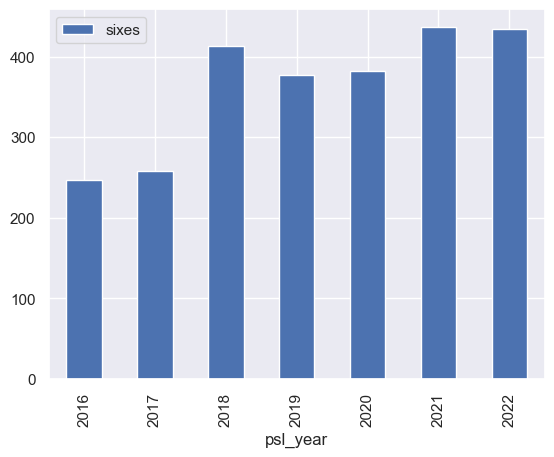

In [16]:
x = boundries_df.plot('psl_year', 'sixes', kind='bar')
# showing Total sixes per year

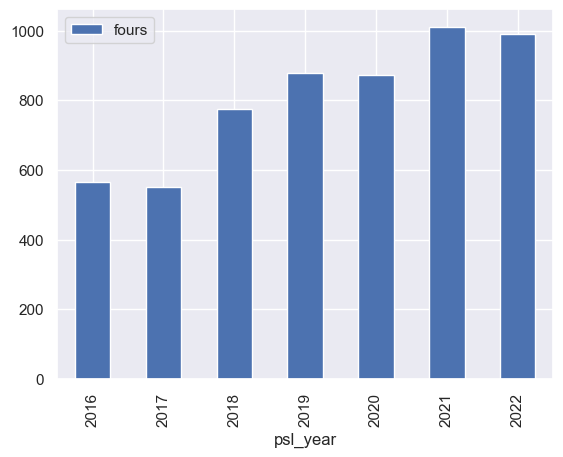

In [17]:
x = boundries_df.plot('psl_year', 'fours', kind='bar')
# showing Total fours per year

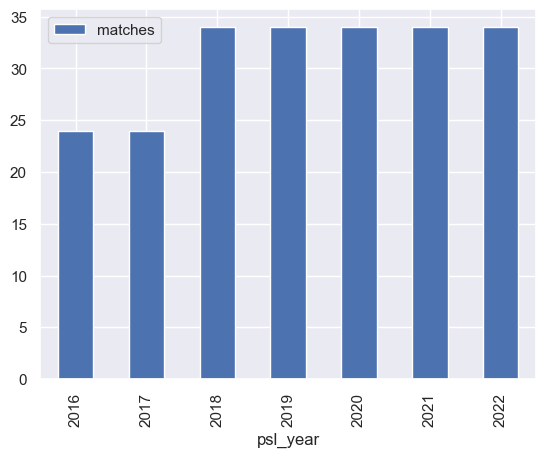

In [18]:
x = boundries_df.plot('psl_year', 'matches', kind='bar')
# showing Total Matches per year

In [20]:
# Average Sixes and Fours Per Year

In [95]:
boundries_df['fours_per_match'] = boundries_df['fours']/boundries_df['matches']
boundries_df['six_per_match'] = boundries_df['sixes']/boundries_df['matches'] 
boundries_df['fours_per_match']

0    23.583333
1    23.000000
2    22.764706
3    25.852941
4    25.676471
5    29.705882
6    29.147059
Name: fours_per_match, dtype: float64

In [97]:
#Average Sixes per Match
boundries_df['six_per_match']

0    10.291667
1    10.750000
2    12.176471
3    11.088235
4    11.264706
5    12.852941
6    12.794118
Name: six_per_match, dtype: float64

In [22]:
boundries_df
#Now boundires_df have 5 columns  fours sixes matches and Four per match aggregate and six per match aggregate

,psl_year,fours,sixes,matches,fours_per_match,six_per_match
0,2016,566,247,24,23.583333,10.291667
1,2017,552,258,24,23.000000,10.750000
2,2018,774,414,34,22.764706,12.176471
3,2019,879,377,34,25.852941,11.088235
4,2020,873,383,34,25.676471,11.264706
5,2021,1010,437,34,29.705882,12.852941
6,2022,991,435,34,29.147059,12.794118


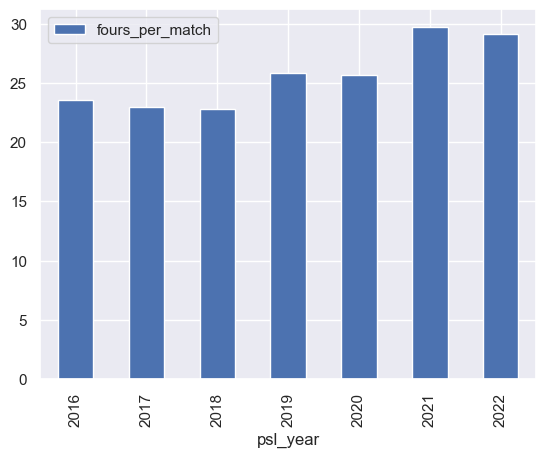

In [23]:
x = boundries_df.plot('psl_year', 'fours_per_match', kind='bar')

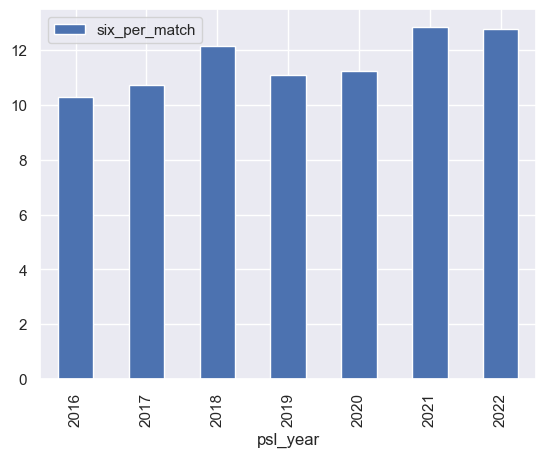

In [24]:
x = boundries_df.plot('psl_year', 'six_per_match', kind='bar')

In [25]:
#Conclusion 
# Most Fours and sixes happened in year 2021 
boundries_df


,psl_year,fours,sixes,matches,fours_per_match,six_per_match
0,2016,566,247,24,23.583333,10.291667
1,2017,552,258,24,23.000000,10.750000
2,2018,774,414,34,22.764706,12.176471
3,2019,879,377,34,25.852941,11.088235
4,2020,873,383,34,25.676471,11.264706
5,2021,1010,437,34,29.705882,12.852941
6,2022,991,435,34,29.147059,12.794118


In [26]:
wickets = psl_p['wicket_text'].value_counts()
wickets

wicket_text
caught            1669
bowled             496
run out            225
lbw                201
stumped             53
hit wicket           5
obstruct field       1
Name: count, dtype: int64

In [27]:

ignored_wickets = ['stumped', 'hit wicket', 'obstruct field']

psl_p['new_wicket_text'] = psl_p['wicket_text'].apply(lambda x: x if x not in ignored_wickets else 'other')
new_wicket_text=psl_p['new_wicket_text'].value_counts()
new_wicket_text

new_wicket_text
caught     1669
bowled      496
run out     225
lbw         201
other        59
Name: count, dtype: int64

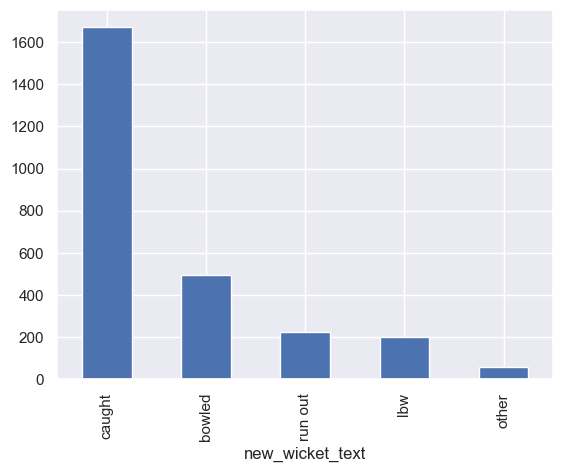

In [28]:
# Assuming 'psl_year' and 'caught' are columns in the DataFrame 'new_wicket_text'
x = new_wicket_text.plot(kind='bar')


# So uptill now we have Gathered the data for Boundries and Wickets 

In [29]:
teams_df = {'Quetta' : psl_p.loc[((psl_p['team_1'] == "Quetta Gladiators") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Quetta Gladiators") & (psl_p['inning'] == 2))],
'Lahore' : psl_p.loc[((psl_p['team_1'] == "Lahore Qalandars") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Lahore Qalandars") & (psl_p['inning'] == 2))],
'Islamabad' : psl_p.loc[((psl_p['team_1'] == "Islamabad United") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Islamabad United") & (psl_p['inning'] == 2))],
'Peshawar' : psl_p.loc[((psl_p['team_1'] == "Peshawar Zalmi") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Peshawar Zalmi") & (psl_p['inning'] == 2))],
'Multan' : psl_p.loc[((psl_p['team_1'] == "Multan Sultans") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Multan Sultans") & (psl_p['inning'] == 2))],
'Karachi' : psl_p.loc[((psl_p['team_1'] == "Karachi Kings") & (psl_p['inning'] == 1)) | ((psl_p['team_2'] == "Karachi Kings") & (psl_p['inning'] == 2))]
}
teams_df  

{'Quetta':        psl_year  match_number             team_1             team_2  inning  \
 124        2016             1   Islamabad United  Quetta Gladiators       2   
 125        2016             1   Islamabad United  Quetta Gladiators       2   
 126        2016             1   Islamabad United  Quetta Gladiators       2   
 127        2016             1   Islamabad United  Quetta Gladiators       2   
 128        2016             1   Islamabad United  Quetta Gladiators       2   
 ...         ...           ...                ...                ...     ...   
 48676      2022            28  Quetta Gladiators      Karachi Kings       1   
 48677      2022            28  Quetta Gladiators      Karachi Kings       1   
 48678      2022            28  Quetta Gladiators      Karachi Kings       1   
 48679      2022            28  Quetta Gladiators      Karachi Kings       1   
 48680      2022            28  Quetta Gladiators      Karachi Kings       1   
 
        over  ball  runs  wi

In [30]:
# Team based Runs from 2016-2017

In [31]:
team_runs = {}
for team_name, value in teams_df.items():
    team_runs[team_name] = value['runs'].sum()
team_matches = {}
for team_name , value in teams_df.items():
    team_matches[team_name] = value.groupby(['psl_year', 'match_number']).ngroups
team_runs

{'Quetta': 10878,
 'Lahore': 11103,
 'Islamabad': 12015,
 'Peshawar': 12775,
 'Multan': 8582,
 'Karachi': 11106}

<BarContainer object of 6 artists>

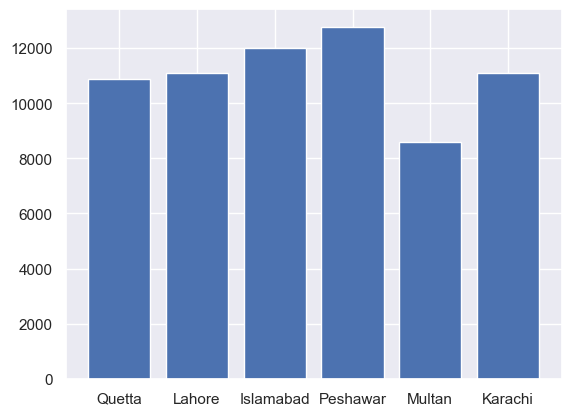

In [32]:
plt.bar(*zip(*team_runs.items()))

In [33]:
# Conclusion 

# Dotball Average by Each Team from 2016-2022

In [34]:
dot_balls_played = {}
total_balls_played = {}
for team, value in teams_df.items():
    dot_balls_played[team]=value[value['runs']==0].shape[0]
    total_balls_played[team]= value.shape[0]

dot_ball_percentage ={}
for team , value in dot_balls_played.items():
    dot_ball_percentage[team] = (value/total_balls_played[team])*100

dot_ball_percentage


{'Quetta': 34.305605569559475,
 'Lahore': 35.27186761229314,
 'Islamabad': 35.545772660571174,
 'Peshawar': 35.46596858638743,
 'Multan': 33.024351924587585,
 'Karachi': 34.72461768425894}

<BarContainer object of 6 artists>

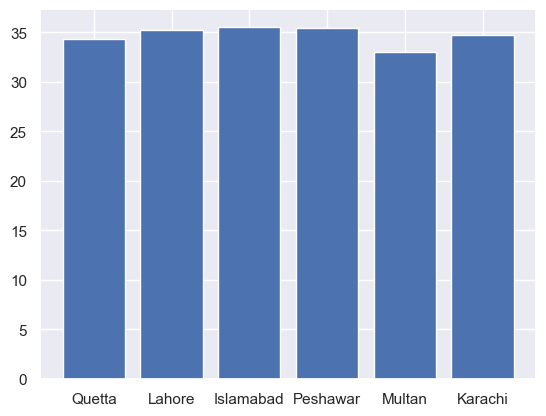

In [35]:
plt.bar(*zip(*dot_ball_percentage.items()))

<BarContainer object of 6 artists>

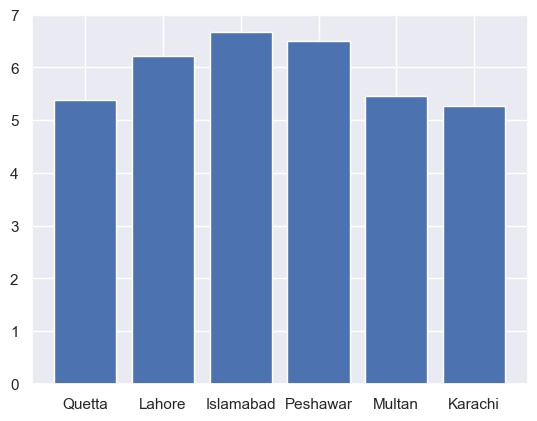

In [36]:
six_per_team = {}
for team, value in teams_df.items():
    six_per_team[team] = value['is_six'].sum()

six_per_match ={}
for team ,value in six_per_team.items():
    six_per_match[team] = value/team_matches[team]

plt.bar(*zip(*six_per_match.items()))

In [37]:
# Four Per Team 

<BarContainer object of 6 artists>

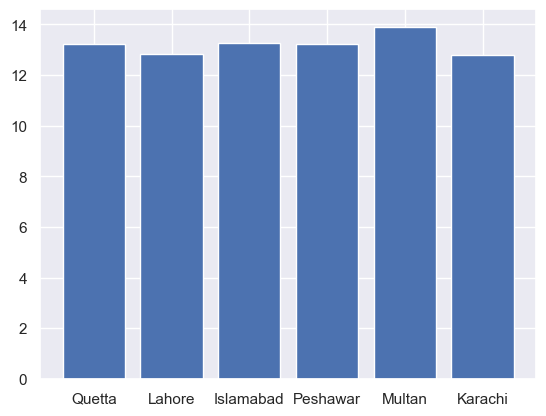

In [38]:
four_per_team = {}
for team, value in teams_df.items():
    four_per_team[team] = value['is_four'].sum()

four_per_match ={}
for team ,value in four_per_team.items():
    four_per_match[team] = value/team_matches[team]

plt.bar(*zip(*four_per_match.items()))

In [39]:
# Runs scored by Each Team

<BarContainer object of 6 artists>

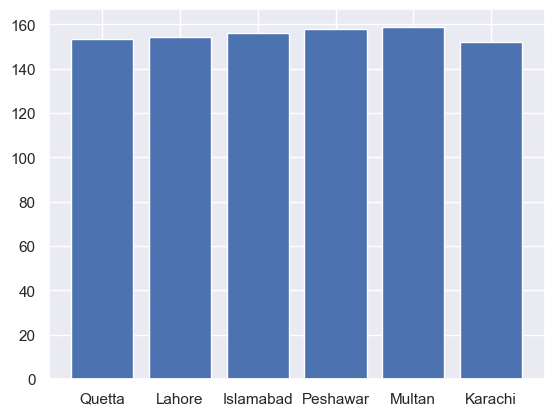

In [40]:
runs_per_team = {}
for team, value in teams_df.items():
    runs_per_team[team] = value['runs'].sum()

runs_per_match ={}
for team ,value in runs_per_team.items():
    runs_per_match[team] = value/team_matches[team]

plt.bar(*zip(*runs_per_match.items()))

In [41]:
# Wicket per Team

<BarContainer object of 6 artists>

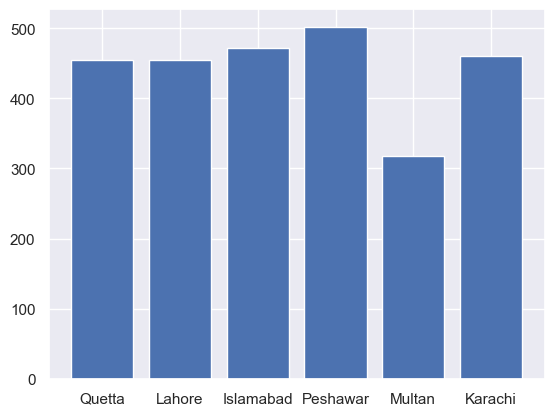

In [42]:
wickets_per_team = {}
for team, value in teams_df.items():
    wickets_per_team[team] = value['is_wicket'].sum()

wickets_per_match ={}
for team ,value in wickets_per_team.items():
    wickets_per_match[team] = value/team_matches[team]

plt.bar(*zip(*wickets_per_team.items()))

# Prediction Training

In [43]:
# Method to calculate if the team batting second won or not
def is_winner(row):
    if type(row['result']) == str:
        if row['result'] in row['team_2']:
            return 1
        return 0
    else:
        return 0

In [44]:
# Method to calculate if a player was dismissed on this ball or not
def is_out(row):
    if type(row['player_dismissed']) == str:
        return 1
    else:
        return 0

# Data Manipulation to Extract Important Features

In [45]:
first_inning = psl_p[psl_p['inning']==1]
second_inning = psl_p[psl_p['inning']==2]

In [46]:
# Calculating Target
total_sum = first_inning.groupby(["psl_year","match_number"]).agg(
   target= ("runs","sum")
)

In [47]:
total_sum = total_sum.reset_index()
total_sum

,psl_year,match_number,target
0,2016,1,128
1,2016,2,125
2,2016,3,145
3,2016,4,147
4,2016,5,117
...,...,...,...
210,2022,30,158
211,2022,31,163
212,2022,32,169
213,2022,33,168


In [48]:
new_df = pd.merge(total_sum, second_inning,  how='left', 
                  left_on=['psl_year','match_number'], right_on = ['psl_year','match_number'])


In [49]:
# Calculating if Second Inning team won or not 
new_df['won'] = new_df.apply(is_winner, axis=1)
new_df

,psl_year,match_number,target,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,new_wicket_text,won
0,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1
1,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,2.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1
2,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,3.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1
3,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,4.0,2.0,0.0,2.0,0.0,False,False,False,NaN,Gladiators,NaN,1
4,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,5.0,0.0,0.0,2.0,0.0,False,False,False,NaN,Gladiators,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24181,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,19.0,5.0,0.0,2.0,138.0,9.0,False,False,True,bowled,Qalandars,bowled,0
24182,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,19.0,6.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0
24183,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,20.0,1.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0
24184,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,20.0,2.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0


# PRedicting the Batter Team Won or not if won 1 else 0

In [50]:
# Calculating balls left
new_df['balls_left'] = 120-(((new_df['over']-1)*6)+new_df['ball'])
new_df

,psl_year,match_number,target,team_1,team_2,inning,over,ball,runs,wicket,total_runs,wickets,is_four,is_six,is_wicket,wicket_text,result,new_wicket_text,won,balls_left
0,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,1.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1,119.0
1,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,2.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1,118.0
2,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,3.0,0.0,0.0,0.0,0.0,False,False,False,NaN,Gladiators,NaN,1,117.0
3,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,4.0,2.0,0.0,2.0,0.0,False,False,False,NaN,Gladiators,NaN,1,116.0
4,2016,1,128,Islamabad United,Quetta Gladiators,2.0,1.0,5.0,0.0,0.0,2.0,0.0,False,False,False,NaN,Gladiators,NaN,1,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24181,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,19.0,5.0,0.0,2.0,138.0,9.0,False,False,True,bowled,Qalandars,bowled,0,7.0
24182,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,19.0,6.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0,6.0
24183,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,20.0,1.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0,5.0
24184,2022,34,180,Lahore Qalandars,Multan Sultans,2.0,20.0,2.0,0.0,0.0,138.0,9.0,False,False,False,NaN,Qalandars,NaN,0,4.0


In [51]:
# Creating the Final Dataset
final_df = new_df[['over','ball','total_runs','wickets','target','balls_left','won']]

In [52]:
final_df.head()

,over,ball,total_runs,wickets,target,balls_left,won
0,1.0,1.0,0.0,0.0,128,119.0,1
1,1.0,2.0,0.0,0.0,128,118.0,1
2,1.0,3.0,0.0,0.0,128,117.0,1
3,1.0,4.0,2.0,0.0,128,116.0,1
4,1.0,5.0,2.0,0.0,128,115.0,1


In [53]:
final_df.loc[:, 'runs_left'] = final_df['target'] - final_df['total_runs']
final_df

,over,ball,total_runs,wickets,target,balls_left,won,runs_left
0,1.0,1.0,0.0,0.0,128,119.0,1,128.0
1,1.0,2.0,0.0,0.0,128,118.0,1,128.0
2,1.0,3.0,0.0,0.0,128,117.0,1,128.0
3,1.0,4.0,2.0,0.0,128,116.0,1,126.0
4,1.0,5.0,2.0,0.0,128,115.0,1,126.0
...,...,...,...,...,...,...,...,...
24181,19.0,5.0,138.0,9.0,180,7.0,0,42.0
24182,19.0,6.0,138.0,9.0,180,6.0,0,42.0
24183,20.0,1.0,138.0,9.0,180,5.0,0,42.0
24184,20.0,2.0,138.0,9.0,180,4.0,0,42.0


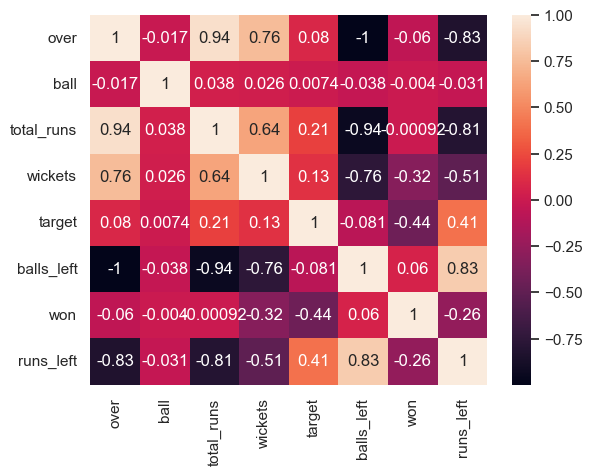

In [54]:
corrMatrix = final_df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Selecting particular columns for our model

In [55]:
new_cols =['wickets','balls_left','runs_left','won']
new_cols

['wickets', 'balls_left', 'runs_left', 'won']

In [56]:
psl_df = final_df[new_cols]
psl_df.head()

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1


In [57]:
psl_df.isnull().sum()

wickets       2
balls_left    2
runs_left     2
won           0
dtype: int64

In [58]:
psl_df.shape

(24186, 4)

In [59]:
psl_df = psl_df.apply (pd.to_numeric, errors='coerce')
psl_df = psl_df.dropna()
psl_df

,wickets,balls_left,runs_left,won
0,0.0,119.0,128.0,1
1,0.0,118.0,128.0,1
2,0.0,117.0,128.0,1
3,0.0,116.0,126.0,1
4,0.0,115.0,126.0,1
...,...,...,...,...
24181,9.0,7.0,42.0,0
24182,9.0,6.0,42.0,0
24183,9.0,5.0,42.0,0
24184,9.0,4.0,42.0,0


In [60]:
# X and Y Split
y = psl_df.iloc[:,3]
X = psl_df.iloc[:,:3]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [62]:
# Training Model
start = time.time()
RF = RandomForestClassifier(n_estimators = 10000, max_depth=6, random_state=0)
RF.fit(X_train, y_train)
print(f"Time Taken to Train {time.time()-start} seconds")

Time Taken to Train 149.41129159927368 seconds


In [78]:
y_pred_test = RF.predict(X_test)

In [80]:
accuracy_score(y_test, y_pred_test)

0.7862311350010337

In [81]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73      2059
           1       0.79      0.86      0.82      2778

    accuracy                           0.79      4837
   macro avg       0.79      0.77      0.78      4837
weighted avg       0.79      0.79      0.78      4837



In [82]:
current= {
    "wickets":1,
    "balls_left" :100,
    "runs_left":107
}
current_df = pd.DataFrame(current,index=[0])
RF.predict_proba(current_df)

array([[0.1923158, 0.8076842]])

In [83]:
XGBC = xgboost.XGBClassifier()
XGBC.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
y_pred = XGBC.predict(X_test)
predictions = [round(value) for value in y_pred]

In [85]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 80.48%


In [86]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      2059
           1       0.82      0.85      0.83      2778

    accuracy                           0.80      4837
   macro avg       0.80      0.80      0.80      4837
weighted avg       0.80      0.80      0.80      4837



In [87]:
current = {
    "wickets": 1,
    "balls_left": 105,
    "runs_left": 137
}
current_df = pd.DataFrame(current, index=[0])

predicted_probabilities = XGBC.predict_proba(current_df)

predicted_probabilities *= 100

print(predicted_probabilities)

[[23.695135 76.30486 ]]


In [88]:
# Define model
SVC_model = svm.SVC()

# Fit model
SVC_model.fit(X_train, y_train)

#Predict Output 
predicted = SVC_model.predict(X_test)
a = accuracy_score(y_test,predicted)
print('The accuracy using SVC Classifier is:',format(a*100))

The accuracy using SVC Classifier is: 78.54041761422368


In [89]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      2059
           1       0.80      0.84      0.82      2778

    accuracy                           0.79      4837
   macro avg       0.78      0.78      0.78      4837
weighted avg       0.78      0.79      0.78      4837



In [90]:
joblib.dump(XGBC, "./model.joblib7")

['./model.joblib7']

In [98]:
import pickle

In [92]:
pickle.dump(XGBC,open('PSL.pkl','wb'))